**Dependencies**

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install opencv-python
!pip install moviepy
!pip install --upgrade moviepy

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from moviepy.editor import VideoFileClip
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

**CSV Training Dataset** 

In [3]:
df = pd.read_csv(r'C:\Users\datapro\Notebooks\train_sent_emo.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB
None


In [5]:
print(df.head())

   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my companys tr...         Chandler   
1       2                   You mustve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   
3       4      So lets talk a little bit about your duties.  The Interviewer   
4       5                             My duties?  All right.         Chandler   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   neutral   neutral            0             0       8       21   
1   neutral   neutral            0             1       8       21   
2   neutral   neutral            0             2       8       21   
3   neutral   neutral            0             3       8       21   
4  surprise  positive            0             4       8       21   

      StartTime       EndTime  
0  00:16:16,059  00:16:21,731  
1  00:16:21,940  00:16:23,442  
2 

In [6]:
# Basic statistical details
print(df.describe())

             Sr No.  Dialogue_ID  Utterance_ID       Season      Episode
count   9989.000000  9989.000000    9989.00000  9989.000000  9989.000000
mean    5262.373511   526.549304       6.14516     4.853739    12.697467
std     3032.169169   302.464741       4.96027     2.389599     7.220051
min        1.000000     0.000000       0.00000     1.000000     1.000000
25%     2641.000000   261.000000       2.00000     3.000000     6.000000
50%     5267.000000   531.000000       5.00000     5.000000    12.000000
75%     7891.000000   795.000000       9.00000     7.000000    19.000000
max    10478.000000  1038.000000      23.00000     9.000000    25.000000


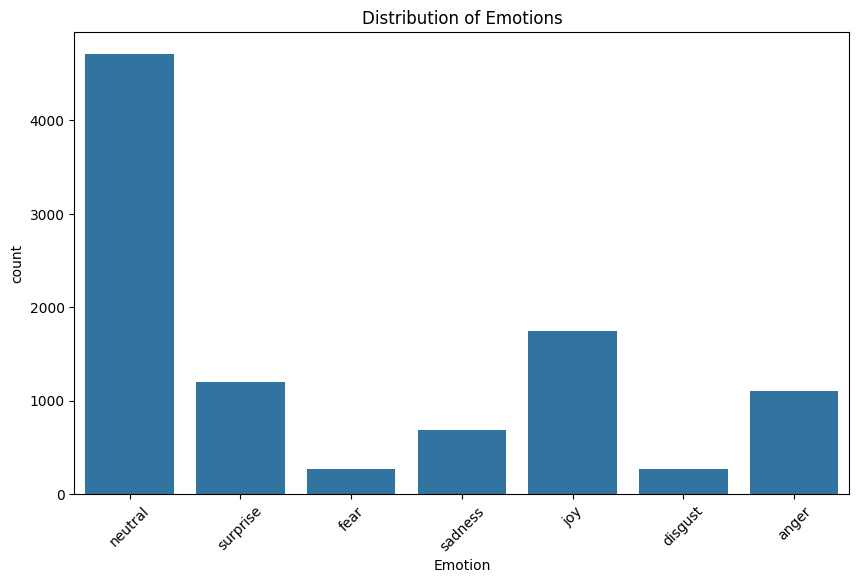

In [7]:
# Visualization of the distribution of emotions (categorical variable)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Emotion')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Check for missing values
print(df.isnull().sum())

Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64


In [9]:
# Check data types and look for any anomalies
print(df.dtypes)

Sr No.           int64
Utterance       object
Speaker         object
Emotion         object
Sentiment       object
Dialogue_ID      int64
Utterance_ID     int64
Season           int64
Episode          int64
StartTime       object
EndTime         object
dtype: object


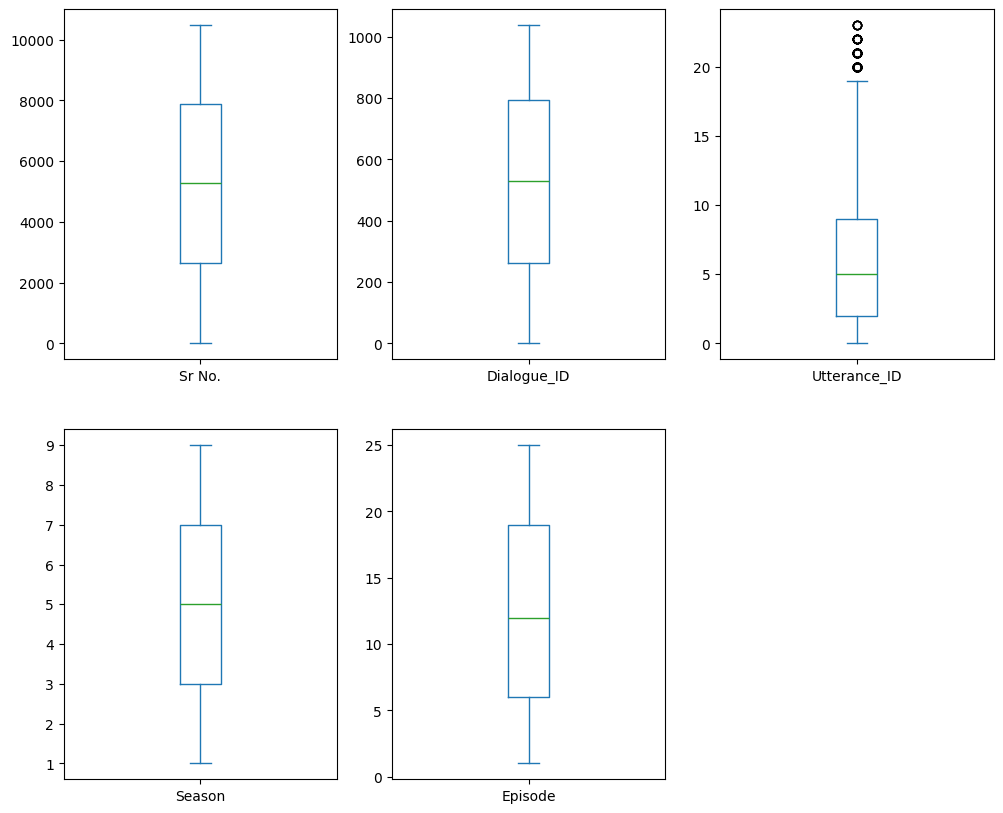

In [10]:
# Boxplot to view statistical summaries and potential outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].plot(kind='box', subplots=True, layout=(2,3), figsize=(12, 10))
plt.show()

In [11]:
df

Sr No.                                          Utterance  \
0          1  also I was the point person on my companys tr...   
1          2                   You mustve had your hands full.   
2          3                            That I did. That I did.   
3          4      So lets talk a little bit about your duties.   
4          5                             My duties?  All right.   
...      ...                                                ...   
9984   10474                                         You or me?   
9985   10475  I got it. Uh, Joey, women don't have Adam's ap...   
9986   10476               You guys are messing with me, right?   
9987   10477                                              Yeah.   
9988   10478  That was a good one. For a second there, I was...   

              Speaker   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  \
0            Chandler   neutral   neutral            0             0       8   
1     The Interviewer   neutral   neutral            0             1       8   
2            Chandler   neutral   neutral            0             2       8   
3     The Interviewer   neutral   neutral            0             3       8   
4            Chandler  surprise  positive            0             4       8   
...               ...       ...       ...          ...           ...     ...   
9984         Chandler   neutral   neutral         1038            13       2   
9985             Ross   neutral   neutral         1038            14       2   
9986             Joey  surprise  positive         1038            15       2   
9987              All   neutral   neutral         1038            16       2   
9988             Joey       joy  positive         1038            17       2   

      Episode     StartTime       EndTime  
0          21  00:16:16,059  00:16:21,731  
1          21  00:16:21,940  00:16:23,442  
2          21  00:16:23,442  00:16:26,389  
3          21  00:16:26,820  00:16:29,572  
4          21  00:16:34,452  00:16:40,917  
...       ...           ...           ...  
9984        3  00:00:48,173  00:00:50,799  
9985        3  00:00:51,009  00:00:53,594  
9986        3  00:01:00,518  00:01:03,520  
9987        3  00:01:05,398  00:01:07,274  
9988        3  00:01:08,401  00:01:12,071  

[9989 rows x 11 columns]

In [12]:
!pip install nltk

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\datapro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\datapro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\datapro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
!pip install spacy

In [15]:
import spacy
from spacy.lang.en import English

# Load the English tokenizer
nlp = English()

def preprocess_text(text):
    # Tokenize the text using Spacy
    doc = nlp(text)
    tokens = [token.text for token in doc]
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    return tokens

# Apply preprocessing to the selected range
df['Processed_Utterance'] = df['Utterance'].apply(preprocess_text)


In [16]:
df

Sr No.                                          Utterance  \
0          1  also I was the point person on my companys tr...   
1          2                   You mustve had your hands full.   
2          3                            That I did. That I did.   
3          4      So lets talk a little bit about your duties.   
4          5                             My duties?  All right.   
...      ...                                                ...   
9984   10474                                         You or me?   
9985   10475  I got it. Uh, Joey, women don't have Adam's ap...   
9986   10476               You guys are messing with me, right?   
9987   10477                                              Yeah.   
9988   10478  That was a good one. For a second there, I was...   

              Speaker   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  \
0            Chandler   neutral   neutral            0             0       8   
1     The Interviewer   neutral   neutral            0             1       8   
2            Chandler   neutral   neutral            0             2       8   
3     The Interviewer   neutral   neutral            0             3       8   
4            Chandler  surprise  positive            0             4       8   
...               ...       ...       ...          ...           ...     ...   
9984         Chandler   neutral   neutral         1038            13       2   
9985             Ross   neutral   neutral         1038            14       2   
9986             Joey  surprise  positive         1038            15       2   
9987              All   neutral   neutral         1038            16       2   
9988             Joey       joy  positive         1038            17       2   

      Episode     StartTime       EndTime  \
0          21  00:16:16,059  00:16:21,731   
1          21  00:16:21,940  00:16:23,442   
2          21  00:16:23,442  00:16:26,389   
3          21  00:16:26,820  00:16:29,572   
4          21  00:16:34,452  00:16:40,917   
...       ...           ...           ...   
9984        3  00:00:48,173  00:00:50,799   
9985        3  00:00:51,009  00:00:53,594   
9986        3  00:01:00,518  00:01:03,520   
9987        3  00:01:05,398  00:01:07,274   
9988        3  00:01:08,401  00:01:12,071   

                                    Processed_Utterance  
0     [also, i, was, the, point, person, on, my, tra...  
1                         [you, had, your, hands, full]  
2                          [that, i, did, that, i, did]  
3       [so, talk, a, little, bit, about, your, duties]  
4                              [my, duties, all, right]  
...                                                 ...  
9984                                      [you, or, me]  
9985  [i, got, it, uh, joey, women, do, have, adam, ...  
9986         [you, guys, are, messing, with, me, right]  
9987                                             [yeah]  
9988  [that, was, a, good, one, for, a, second, ther...  

[9989 rows x 12 columns]

In [17]:
import pandas as pd

# Function to convert time to seconds
def time_to_seconds(time_str):
    h, m, s_ms = time_str.split(':')
    s, ms = s_ms.split(',')
    return int(h) * 3600 + int(m) * 60 + int(s) + int(ms) / 1000

# Calculate duration
df['StartTime_seconds'] = df['StartTime'].apply(time_to_seconds)
df['EndTime_seconds'] = df['EndTime'].apply(time_to_seconds)
df['Duration'] = df['EndTime_seconds'] - df['StartTime_seconds']

# Drop temporary columns
df = df.drop(columns=['Sr No.','Utterance','StartTime_seconds', 'EndTime_seconds'])




In [18]:
df

Speaker   Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  \
0            Chandler   neutral   neutral            0             0       8   
1     The Interviewer   neutral   neutral            0             1       8   
2            Chandler   neutral   neutral            0             2       8   
3     The Interviewer   neutral   neutral            0             3       8   
4            Chandler  surprise  positive            0             4       8   
...               ...       ...       ...          ...           ...     ...   
9984         Chandler   neutral   neutral         1038            13       2   
9985             Ross   neutral   neutral         1038            14       2   
9986             Joey  surprise  positive         1038            15       2   
9987              All   neutral   neutral         1038            16       2   
9988             Joey       joy  positive         1038            17       2   

      Episode     StartTime       EndTime  \
0          21  00:16:16,059  00:16:21,731   
1          21  00:16:21,940  00:16:23,442   
2          21  00:16:23,442  00:16:26,389   
3          21  00:16:26,820  00:16:29,572   
4          21  00:16:34,452  00:16:40,917   
...       ...           ...           ...   
9984        3  00:00:48,173  00:00:50,799   
9985        3  00:00:51,009  00:00:53,594   
9986        3  00:01:00,518  00:01:03,520   
9987        3  00:01:05,398  00:01:07,274   
9988        3  00:01:08,401  00:01:12,071   

                                    Processed_Utterance  Duration  
0     [also, i, was, the, point, person, on, my, tra...     5.672  
1                         [you, had, your, hands, full]     1.502  
2                          [that, i, did, that, i, did]     2.947  
3       [so, talk, a, little, bit, about, your, duties]     2.752  
4                              [my, duties, all, right]     6.465  
...                                                 ...       ...  
9984                                      [you, or, me]     2.626  
9985  [i, got, it, uh, joey, women, do, have, adam, ...     2.585  
9986         [you, guys, are, messing, with, me, right]     3.002  
9987                                             [yeah]     1.876  
9988  [that, was, a, good, one, for, a, second, ther...     3.670  

[9989 rows x 11 columns]

In [19]:
Y=df['Emotion']

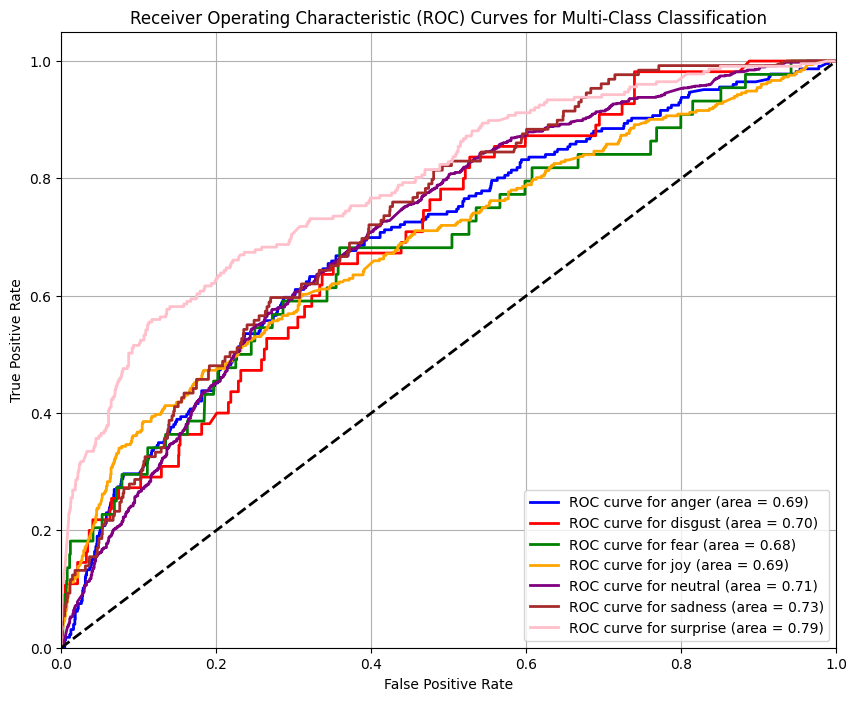

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming df is your dataframe
df['Processed_Utterance_Str'] = df['Processed_Utterance'].apply(lambda x: ' '.join(x))
X = df['Processed_Utterance_Str']
Y = df['Emotion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict probabilities for each class
y_pred_proba = model.predict_proba(X_test_tfidf)

# Binarize the labels for multi-class ROC AUC computation
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
class_names = lb.classes_

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [22]:
# Make predictions
y_pred = model.predict(X_tfidf)

# Evaluate the model
report = classification_report(Y, y_pred)
print(report)

NameError: name 'X_tfidf' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(Y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
a

In [ ]:
!pip install tensorflow

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Convert processed utterances back to string format for tokenization
df['Processed_Utterance_Str'] = df['Processed_Utterance'].apply(lambda x: ' '.join(x))

# Encode labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Utterance_Str'], df['Encoded_Emotion'], test_size=0.2, random_state=42)

# Initialize Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pad, y_train)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.long)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pad, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc(x)
        return x

# Initialize model, loss function, and optimizer
vocab_size = len(tokenizer.word_index) + 1
embed_size = 100
hidden_size = 128
num_layers = 2  # Number of LSTM layers
num_classes = len(df['Encoded_Emotion'].unique())
model = LSTMModel(vocab_size, embed_size, hidden_size, num_layers, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
model.train()
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [10/408], Loss: 1.9453
Epoch [1/10], Step [20/408], Loss: 1.9067
Epoch [1/10], Step [30/408], Loss: 1.9470
Epoch [1/10], Step [40/408], Loss: 1.9188
Epoch [1/10], Step [50/408], Loss: 1.9051
Epoch [1/10], Step [60/408], Loss: 1.8914
Epoch [1/10], Step [70/408], Loss: 1.8449
Epoch [1/10], Step [80/408], Loss: 1.9662
Epoch [1/10], Step [90/408], Loss: 1.8385
Epoch [1/10], Step [100/408], Loss: 1.9159
Epoch [1/10], Step [110/408], Loss: 1.8862
Epoch [1/10], Step [120/408], Loss: 1.8694
Epoch [1/10], Step [130/408], Loss: 1.8750
Epoch [1/10], Step [140/408], Loss: 1.8829
Epoch [1/10], Step [150/408], Loss: 1.9478
Epoch [1/10], Step [160/408], Loss: 1.9425
Epoch [1/10], Step [170/408], Loss: 1.8957
Epoch [1/10], Step [180/408], Loss: 1.8228
Epoch [1/10], Step [190/408], Loss: 1.7952
Epoch [1/10], Step [200/408], Loss: 1.8840
Epoch [1/10], Step [210/408], Loss: 1.9122
Epoch [1/10], Step [220/408], Loss: 1.9037
Epoch [1/10], Step [230/408], Loss: 1.8060
Epoch [1/10], Step [

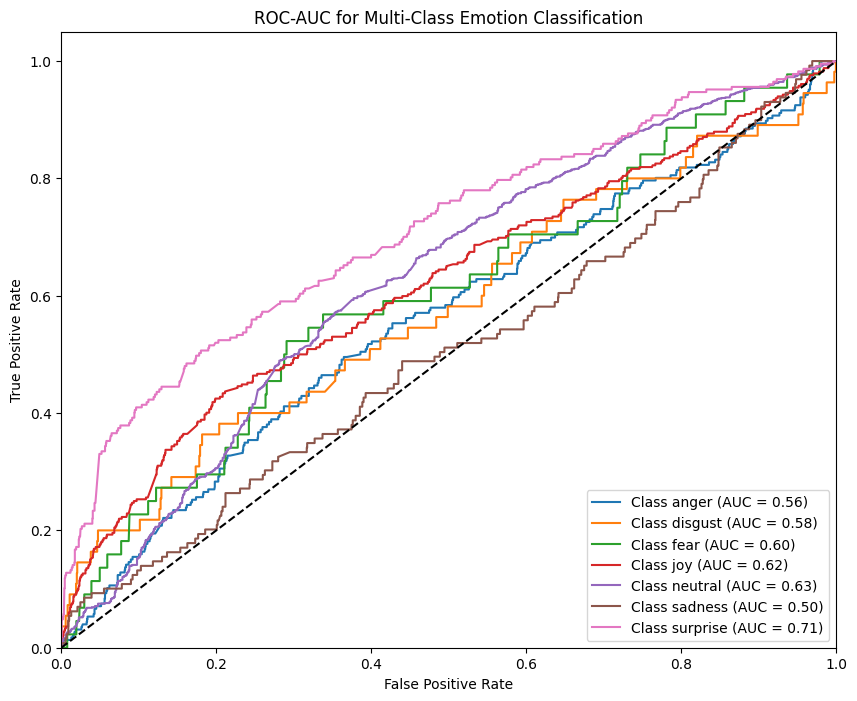

In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming `y_test` and `y_pred` are available after predictions

# One-hot encode the labels for multiclass ROC-AUC
y_test_bin = label_binarize(y_test_tensor, classes=range(num_classes))
y_train_bin = label_binarize(y_train_tensor, classes=range(num_classes))

# Get predicted probabilities
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_tensor)
    y_pred_prob = torch.softmax(y_pred_prob, dim=1).numpy()

# Calculate ROC-AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC for Multi-Class Emotion Classification')
plt.legend(loc="lower right")
plt.show()


In [24]:
import torch
from sklearn.metrics import classification_report

# Assuming you have X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor already defined

# Combine train and test sets
X_combined_tensor = torch.cat((X_train_tensor, X_test_tensor), dim=0)
y_combined_tensor = torch.cat((y_train_tensor, y_test_tensor), dim=0)

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_combined_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)
    report = classification_report(y_combined_tensor, y_pred_classes, target_names=label_encoder.classes_)
    print(report)


              precision    recall  f1-score   support

       anger       0.86      0.85      0.86      3951
     disgust       0.91      0.96      0.93      3780
        fear       0.91      0.95      0.93      3769
         joy       0.86      0.84      0.85      4057
     neutral       0.86      0.82      0.84      4710
     sadness       0.90      0.88      0.89      3854
    surprise       0.87      0.88      0.88      3952

    accuracy                           0.88     28073
   macro avg       0.88      0.88      0.88     28073
weighted avg       0.88      0.88      0.88     28073



In [25]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)
    report = classification_report(y_test_tensor, y_pred_classes,target_names=label_encoder.classes_)
    print(report)


              precision    recall  f1-score   support

       anger       0.17      0.19      0.18       226
     disgust       0.09      0.20      0.13        55
        fear       0.06      0.14      0.08        44
         joy       0.31      0.32      0.31       332
     neutral       0.62      0.49      0.55       985
     sadness       0.10      0.11      0.10       129
    surprise       0.34      0.39      0.36       227

    accuracy                           0.38      1998
   macro avg       0.24      0.26      0.24      1998
weighted avg       0.42      0.38      0.40      1998



In [27]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Input is already in dense format, no embedding needed
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])  # Use the output of the last time step
        x = self.fc(x)
        return x


TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not csr_matrix

In [ ]:
cm = confusion_matrix(y_test_tensor, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Data with LSTM)')
plt.show()

In [ ]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_train_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)
    report = classification_report(y_train_tensor, y_pred_classes)
    print(report)


In [ ]:
cm = confusion_matrix(y_train_tensor, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Data with LSTM)')
plt.show()

In [ ]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'text_lstm_emotion_model.pth')


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [ ]:
a

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.model_selection import ParameterGrid
import random

# Convert processed utterances back to string format for tokenization
df['Processed_Utterance_Str'] = df['Processed_Utterance'].apply(lambda x: ' '.join(x))

# Encode labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Utterance_Str'], df['Encoded_Emotion'], test_size=0.2, random_state=42)

# Initialize Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pad, y_train)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.long)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pad, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc(x)
        return x

# Define the hyperparameter grid
param_grid = {
    'embed_size': [50, 100],
    'hidden_size': [64, 128],
    'num_layers': [1, 2],
    'dropout': [0.2, 0.3],
    'learning_rate': [0.001, 0.005],
    'batch_size': [32, 64]
}

# Generate all combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

best_params = None
best_accuracy = 0

for params in param_combinations:
    # Update model and optimizer with new parameters
    model = LSTMModel(vocab_size, params['embed_size'], params['hidden_size'], params['num_layers'], num_classes)
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

    # DataLoader with new batch size
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for i, (inputs, labels) in enumerate(train_loader):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate the model on the test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    print(f'Params: {params}, Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best params: {best_params}, Best accuracy: {best_accuracy:.4f}')
